# Notebook 01: Data Exploration & Profiling

**Objective**: Understand the dataset structure and basic statistics of the Digimon Knowledge Graph.

This notebook performs:
- Connection verification to Neo4j database
- Data profiling and quality assessment
- Statistical summaries of all entities
- Initial visualizations of distributions

---

In [1]:
# Dependency check
import sys

def check_dependencies():
    """Check if all required packages are installed."""
    required_packages = [
        'pandas', 'matplotlib', 'seaborn', 'plotly', 
        'networkx', 'sklearn', 'community', 'pyvis'
    ]
    
    missing_packages = []
    for package in required_packages:
        try:
            __import__(package)
        except ImportError:
            # Handle special case for python-louvain
            if package == 'community':
                try:
                    __import__('community.community_louvain')
                except ImportError:
                    missing_packages.append('python-louvain')
            else:
                missing_packages.append(package)
    
    if missing_packages:
        print("⚠️  Missing required packages:")
        for pkg in missing_packages:
            print(f"   - {pkg}")
        print("\n📦 To install all dependencies, run:")
        print("   pip install -r requirements.txt")
        print("\n   Or install individually:")
        print(f"   pip install {' '.join(missing_packages)}")
        return False
    else:
        print("✅ All required packages are installed!")
        return True

# Run dependency check
if not check_dependencies():
    print("\n❌ Please install missing dependencies before continuing.")
    sys.exit(1)

✅ All required packages are installed!


## 1. Setup and Imports

In [2]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
import warnings
warnings.filterwarnings('ignore')

# Custom utilities
from utils import (
    Neo4jConnector, test_connection,
    plot_distribution, plot_heatmap, save_figure,
    TYPE_COLORS, ATTRIBUTE_COLORS, LEVEL_COLORS
)

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 50)

# Set notebook name for organized outputs
notebook_name = "01_data_exploration"

print("Environment setup complete!")

Environment setup complete!


## 2. Database Connection

In [3]:
# Test connection
print("Testing Neo4j connection...")
if test_connection():
    print("✓ Connection successful!")
else:
    print("✗ Connection failed. Please check your Neo4j instance.")
    raise ConnectionError("Cannot connect to Neo4j")

# Create connector instance
conn = Neo4jConnector()
print("\nConnector initialized.")

Testing Neo4j connection...
✓ Connection successful!

Connector initialized.


## 3. Data Extraction and Profiling

In [4]:
# Get graph statistics
print("Fetching graph statistics...")
stats = conn.get_graph_statistics()

print("\n=== GRAPH STATISTICS ===")
print(f"Total Nodes: {stats['total_nodes']:,}")
print(f"Total Relationships: {stats['total_relationships']:,}")
print("\nNode Breakdown:")
print(f"  - Digimon: {stats['digimon_count']:,}")
print(f"  - Types: {stats['type_count']:,}")
print(f"  - Attributes: {stats['attribute_count']:,}")
print(f"  - Levels: {stats['level_count']:,}")
print(f"  - Moves: {stats['move_count']:,}")
print("\nRelationship Breakdown:")
print(f"  - HAS_TYPE: {stats['has_type_count']:,}")
print(f"  - HAS_ATTRIBUTE: {stats['has_attribute_count']:,}")
print(f"  - HAS_LEVEL: {stats['has_level_count']:,}")
print(f"  - CAN_USE: {stats['can_use_count']:,}")
print(f"  - RELATED_TO: {stats['related_to_count']:,}")

Fetching graph statistics...

=== GRAPH STATISTICS ===
Total Nodes: 3,562
Total Relationships: 337,147

Node Breakdown:
  - Digimon: 1,258
  - Types: 142
  - Attributes: 8
  - Levels: 15
  - Moves: 2,139

Relationship Breakdown:
  - HAS_TYPE: 1,249
  - HAS_ATTRIBUTE: 1,249
  - HAS_LEVEL: 1,249
  - CAN_USE: 2,433
  - RELATED_TO: 3,746


In [5]:
# Load all Digimon data
print("Loading Digimon data...")
digimon_df = conn.get_all_digimon()
print(f"\nLoaded {len(digimon_df):,} Digimon records")

# Display sample
print("\nSample data:")
digimon_df.head(10)

Loading Digimon data...

Loaded 1,258 Digimon records

Sample data:


,name_en,name_jp,profile_en,profile_jp,image_url,level,type,attribute
0,ABBADOMON,アバドモン,A mysterious Digimon has evolved into a huge a...,ネットワークに溢れる負のデータを、極限以上に吸収して巨大に進化した謎のデジモン。その存在目的...,https://digimon.net/cimages/digimon/abbadomon.jpg,Mega,Tribe unknown Species,Unknown
1,ABBADOMONCORE,アバドモンコア,"It is the body that exists inside Abadmon, and...",アバドモンの内部に存在する本体であり、アバドモンの真の姿。無を求め、無を好み、無以外を拒絶す...,https://digimon.net/cimages/digimon/abbadomonc...,Mega,Tribe unknown Species,Unknown
2,ACHILLESMON,アキレウスモン,The ultimate Digimon has been well-versed in a...,古今東西のあらゆる競技に精通し、極めることで進化した究極体デジモン。心技体すべてが備わってお...,https://digimon.net/cimages/digimon/achillesmo...,Mega,Beastman Type,Virus
3,AEGIOCHUSMON,アイギオテュースモン,A divine human-shaped Digimon based on the hum...,人間の身体をベースに、様々な種族の能力を合成させた神人型のデジモン。種族の合成は全能という究...,https://digimon.net/cimages/digimon/aegiochusm...,Ultimate,God Type,Vaccine
4,AEGIOCHUSMON:BLUE,アイギオテュースモン：ブルー,A divine human-shaped Digimon based on the hum...,人間の身体をベースに、様々な種族の能力を合成させた神人型のデジモン。種族の合成は全能という究...,https://digimon.net/cimages/digimon/aegiochusm...,Ultimate,God Type,Vaccine
5,AEGIOCHUSMON:DARK,アイギオテュースモン：ダーク,A divine human-shaped Digimon based on the hum...,人間の身体をベースに、様々な種族の能力を合成させた神人型のデジモン。種族の合成は全能という究...,https://digimon.net/cimages/digimon/aegiochusm...,Ultimate,God Type,Vaccine
6,AEGIOCHUSMON:GREEN,アイギオテュースモン：グリーン,A divine human-shaped Digimon based on the hum...,人間の身体をベースに、様々な種族の能力を合成させた神人型のデジモン。種族の合成は全能という究...,https://digimon.net/cimages/digimon/aegiochusm...,Ultimate,God Type,Vaccine
7,AEGIOCHUSMON_HOLLY,アイギオテュースモン：ホーリー,A divine human-shaped Digimon based on the hum...,人間の身体をベースに、様々な種族の能力を合成させた神人型のデジモン。種族の合成は全能という究...,https://digimon.net/cimages/digimon/aegiochusm...,Ultimate,God Type,Vaccine
8,AEGIOMON,アイギオモン,A divine human-shaped Digimon with a human upp...,人間の上半身に山羊の下半身が融合した姿を持つ神人型デジモン。普段はセイレーンモンと同じ奏楽団...,https://digimon.net/cimages/digimon/aegiomon.jpg,Champion,God Type,Vaccine
9,AGEISDRAMON,イージスドラモン,A cyborg-type Digimon created by combining Pre...,プレシオモンにシードラモン系のデータが融合して生まれたサイボーグ型デジモン。ゴールドデジゾイ...,https://digimon.net/cimages/digimon/ageisdramo...,Mega,cyborg Type,Vaccine


In [6]:
# Data quality assessment
print("=== DATA QUALITY ASSESSMENT ===")
print("\nMissing values per column:")
missing = digimon_df.isnull().sum()
missing_pct = (missing / len(digimon_df) * 100).round(2)
quality_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
})
print(quality_df)

# Check for duplicates
duplicates = digimon_df.duplicated(subset=['name_en']).sum()
print(f"\nDuplicate Digimon names: {duplicates}")

# Profile text lengths
print("\nProfile text statistics:")
profile_lengths = digimon_df['profile_en'].str.len()
print(f"  - Mean length: {profile_lengths.mean():.0f} characters")
print(f"  - Median length: {profile_lengths.median():.0f} characters")
print(f"  - Min length: {profile_lengths.min():.0f} characters")
print(f"  - Max length: {profile_lengths.max():.0f} characters")

=== DATA QUALITY ASSESSMENT ===

Missing values per column:
            Missing Count  Missing %
name_en                 9       0.72
name_jp                 0       0.00
profile_en              9       0.72
profile_jp              9       0.72
image_url               9       0.72
level                   9       0.72
type                    9       0.72
attribute               9       0.72

Duplicate Digimon names: 8

Profile text statistics:
  - Mean length: 725 characters
  - Median length: 666 characters
  - Min length: 147 characters
  - Max length: 2179 characters


## 4. Statistical Analysis

In [7]:
# Level distribution
level_dist = conn.get_level_distribution()
print("=== LEVEL DISTRIBUTION ===")
print(level_dist)

# Create ordered level list
level_order = ['Baby', 'In-Training', 'Rookie', 'Champion', 'Ultimate', 'Mega', 'Ultra']
level_dist['level'] = pd.Categorical(level_dist['level'], categories=level_order, ordered=True)
level_dist = level_dist.sort_values('level')

=== LEVEL DISTRIBUTION ===
                         level  count
0                         Mega    328
1                     Ultimate    248
2                     Champion    243
3                       Rookie    146
4                        Armor     67
5                      Baby II     52
6                       Baby I     44
7                       Hybrid     32
8        Maturity (Cross Wars)     26
9   Growth period (Cross Wars)     19
10       Complete (Cross Wars)     19
11  Ultimate Body (Cross Wars)     17
12   Childhood II (Cross Wars)      3
13                     Unknown      3
14    Childhood I (Cross Wars)      2


In [8]:
# Type distribution
type_dist = conn.get_type_distribution()
print("\n=== TYPE DISTRIBUTION (Top 20) ===")
print(type_dist.head(20))


=== TYPE DISTRIBUTION (Top 20) ===
                type  count
0        cyborg Type     98
1      mutation Type     56
2        Puppet Type     48
3        insect Type     41
4       Machine Type     41
5         Demon Type     39
6         beast Type     39
7      Beastman Type     38
8           God Type     38
9   Holy Knight Type     35
10        Slime Type     35
11   Holy Beast Type     31
12       Lesser Type     30
13       Dragon Type     27
14     dinosaur Type     26
15        plant Type     25
16  Demon Beast Type     25
17        fairy Type     24
18    mammalian Type     22
19       Undead Type     22


In [9]:
# Attribute distribution
attr_dist = conn.get_attribute_distribution()
print("\n=== ATTRIBUTE DISTRIBUTION ===")
print(attr_dist)


=== ATTRIBUTE DISTRIBUTION ===
  attribute  count
0     Virus    397
1      Data    308
2   Vaccine    295
3              101
4      Free     86
5  Variable     32
6   Unknown     28
7    NODATA      2


In [10]:
# Cross-tabulation: Level vs Attribute
level_attr_cross = pd.crosstab(digimon_df['level'], digimon_df['attribute'])
print("\n=== LEVEL vs ATTRIBUTE CROSS-TABULATION ===")
print(level_attr_cross)


=== LEVEL vs ATTRIBUTE CROSS-TABULATION ===
attribute                       Data  Free  NODATA  Unknown  Vaccine  \
level                                                                  
Armor                        0     2    61       0        0        2   
Baby I                      44     0     0       0        0        0   
Baby II                     52     0     0       0        0        0   
Champion                     0    78     6       0        4       63   
Childhood I (Cross Wars)     2     0     0       0        0        0   
Childhood II (Cross Wars)    3     0     0       0        0        0   
Complete (Cross Wars)        0     5     1       0        0        4   
Growth period (Cross Wars)   0     9     0       0        0        5   
Hybrid                       0     0     0       0        0        0   
Maturity (Cross Wars)        0    11     0       0        0        4   
Mega                         0    82     7       2       14       99   
Rookie             

## 5. Visualizations

Saved: ../results/01_data_exploration/figures/level_distribution.png
Saved: ../results/01_data_exploration/figures/level_distribution.svg
Saved: ../results/01_data_exploration/figures/level_distribution.pdf


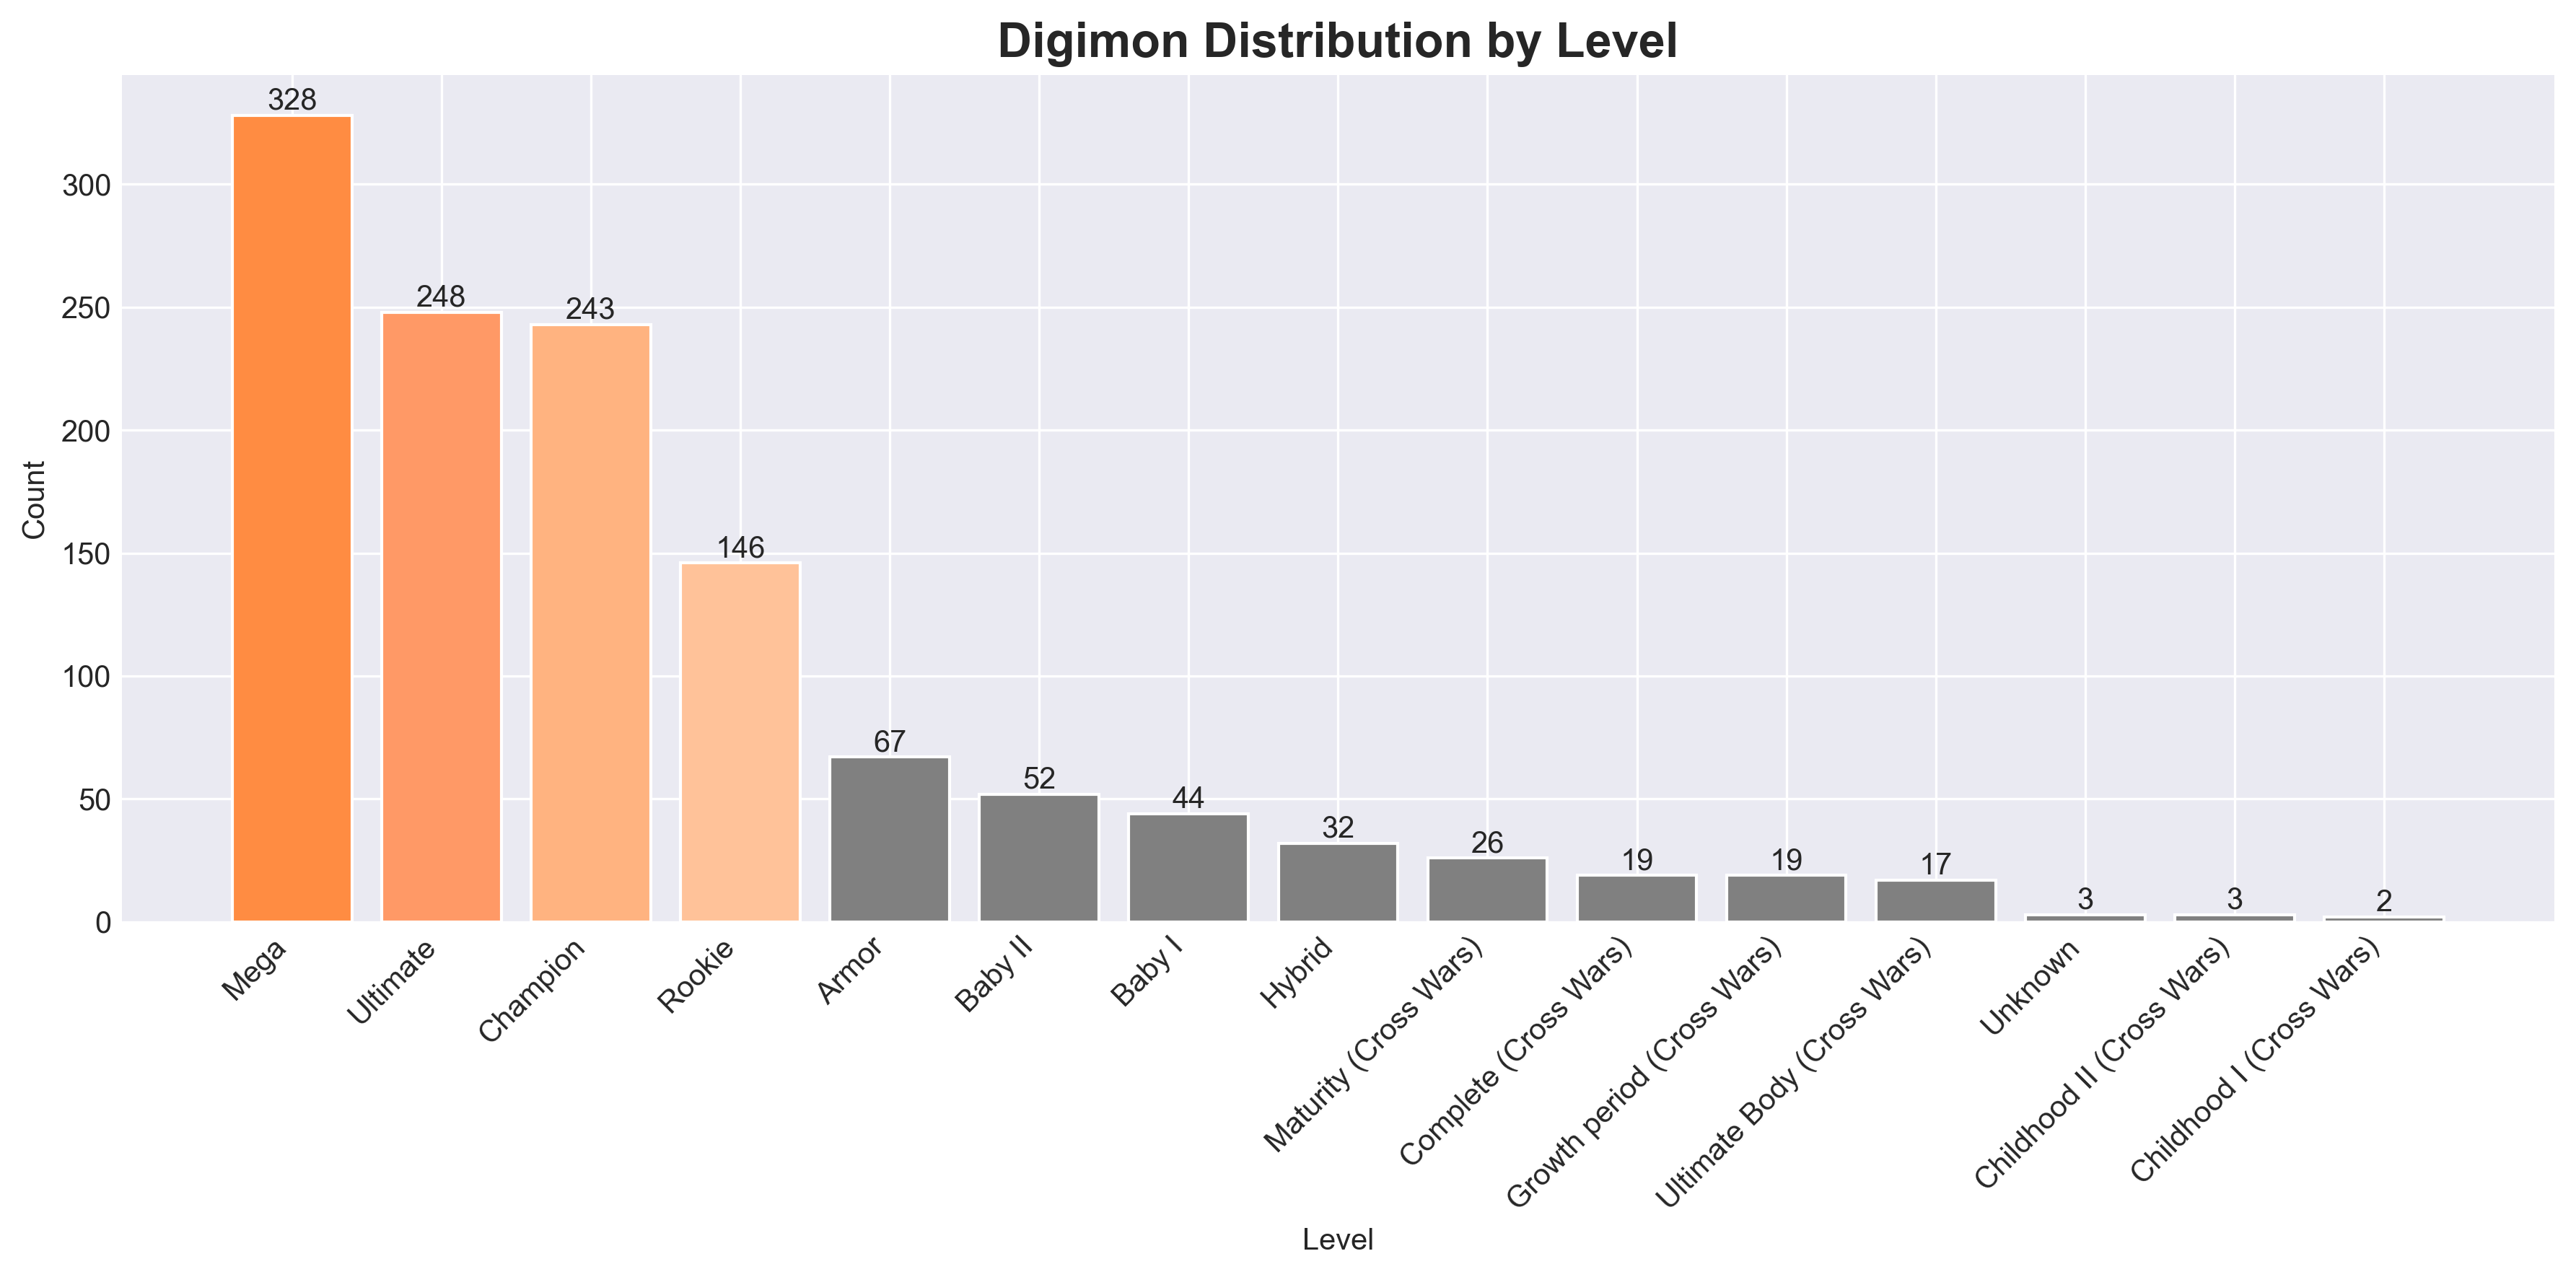

In [11]:
# Level distribution plot
fig = plot_distribution(
    digimon_df['level'],
    title="Digimon Distribution by Level",
    xlabel="Level",
    color_map=LEVEL_COLORS
)
save_figure(fig, "level_distribution", notebook_name=notebook_name)
plt.show()

Saved: ../results/01_data_exploration/figures/type_distribution.png
Saved: ../results/01_data_exploration/figures/type_distribution.svg
Saved: ../results/01_data_exploration/figures/type_distribution.pdf


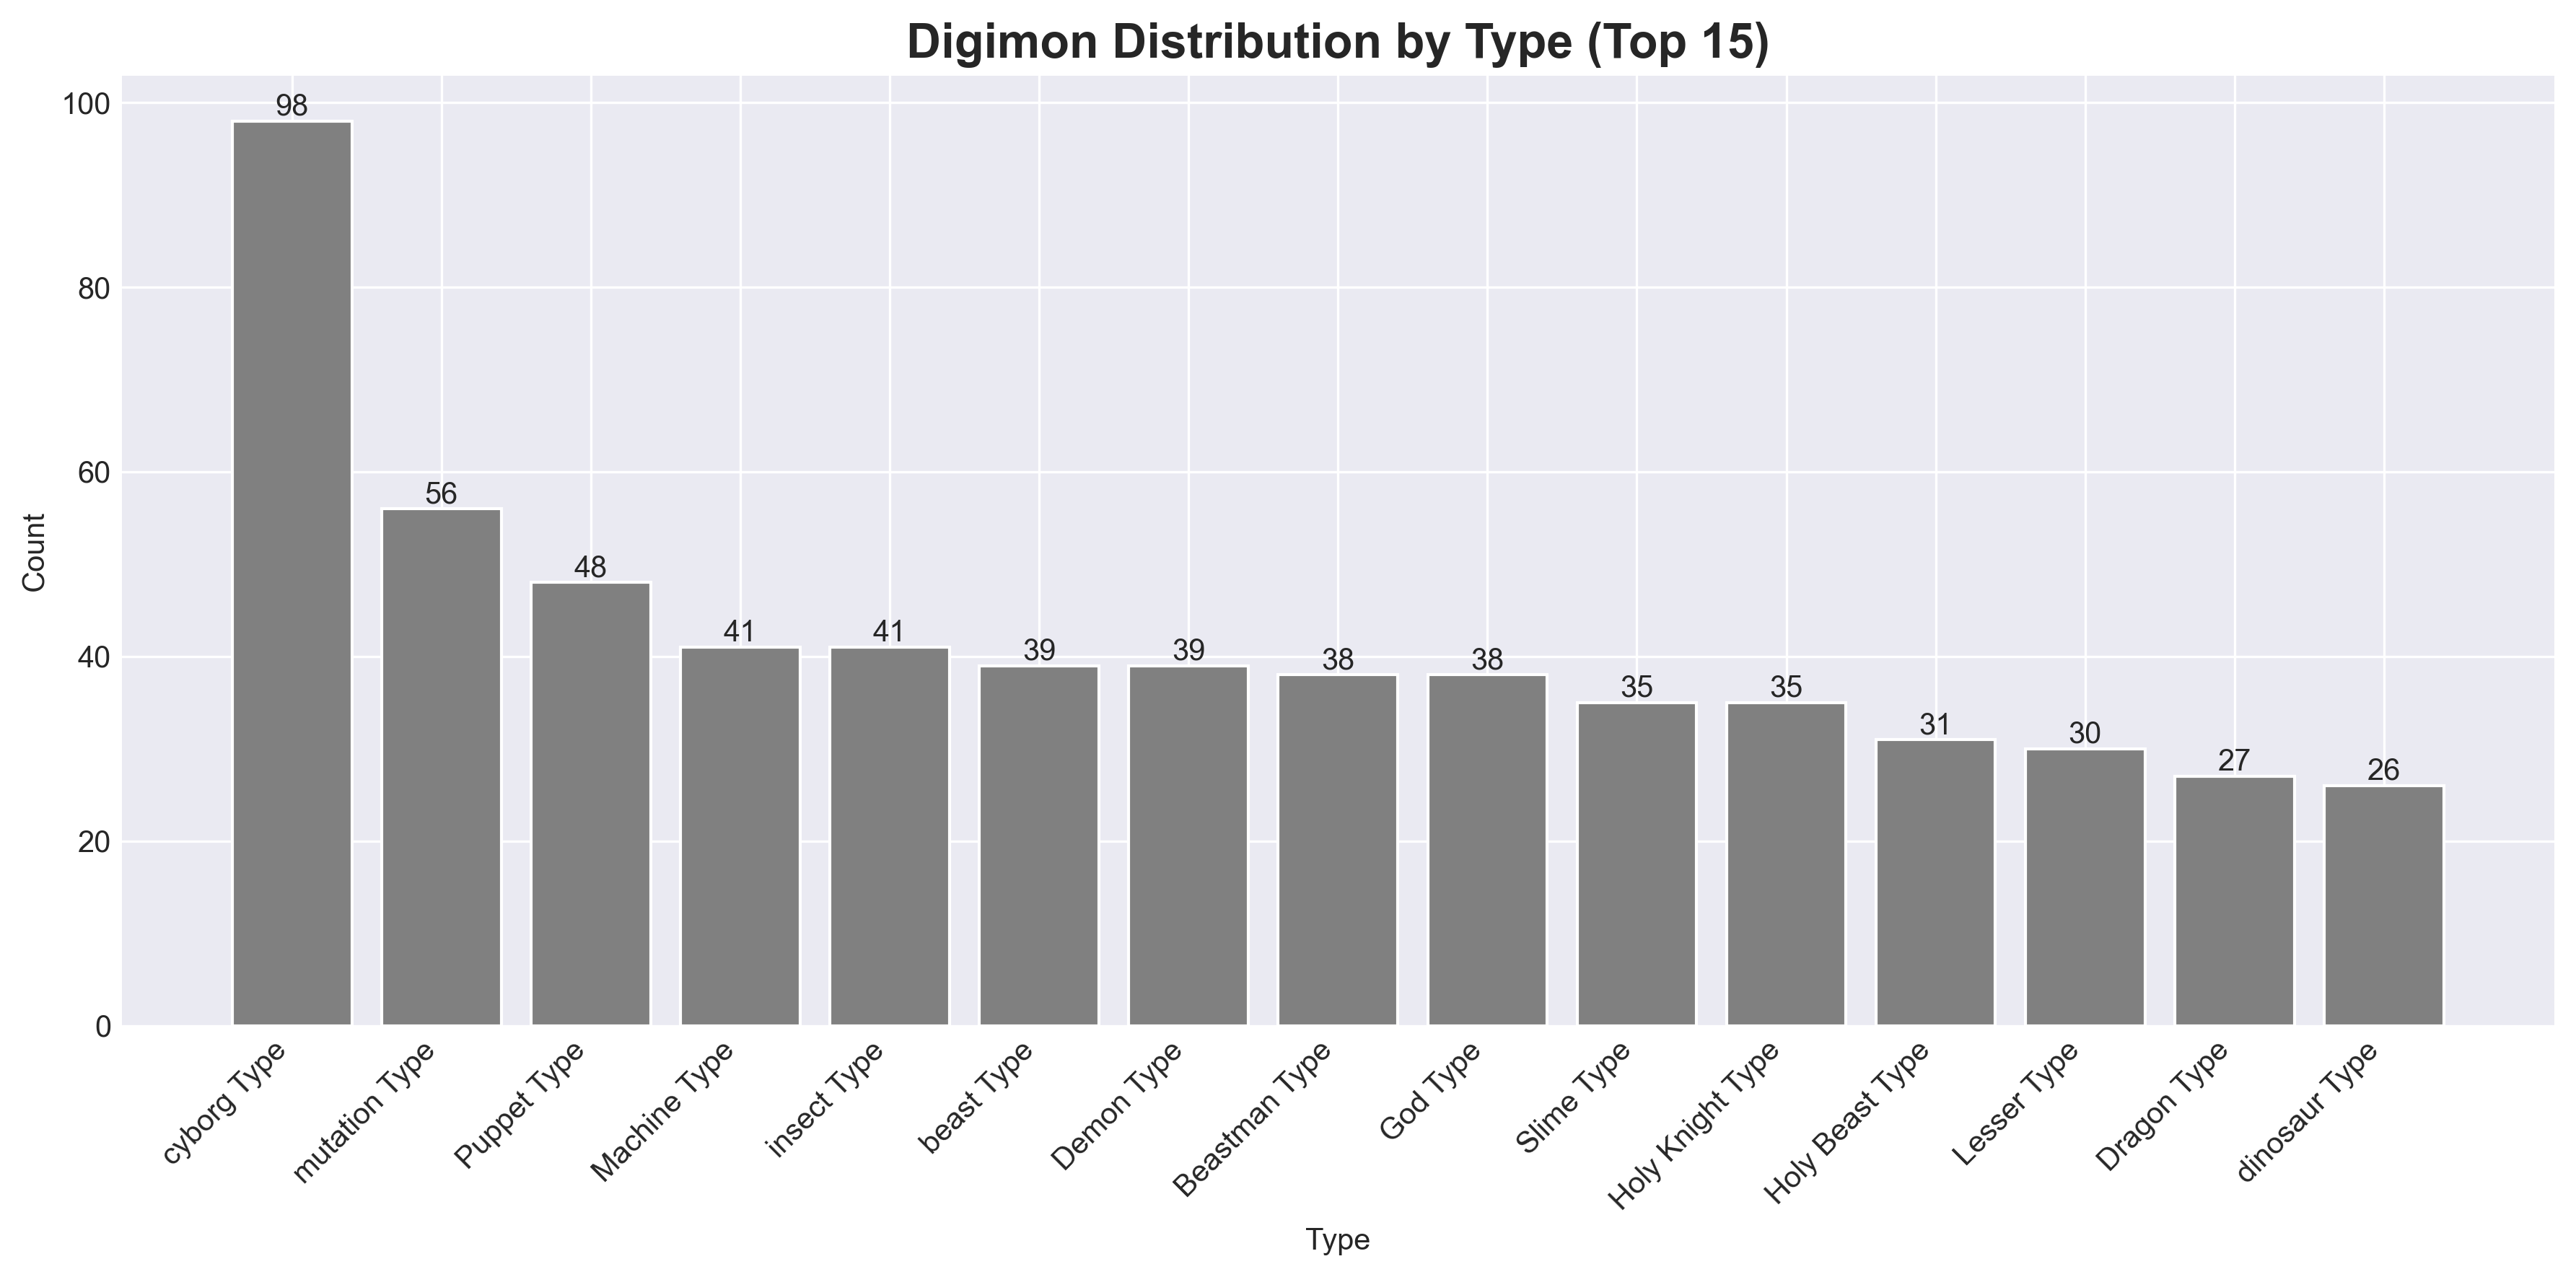

In [12]:
# Type distribution plot (top 15)
fig = plot_distribution(
    digimon_df['type'],
    title="Digimon Distribution by Type (Top 15)",
    xlabel="Type",
    color_map=TYPE_COLORS,
    top_n=15
)
save_figure(fig, "type_distribution", notebook_name=notebook_name)
plt.show()

Saved: ../results/01_data_exploration/figures/attribute_distribution.png
Saved: ../results/01_data_exploration/figures/attribute_distribution.svg
Saved: ../results/01_data_exploration/figures/attribute_distribution.pdf


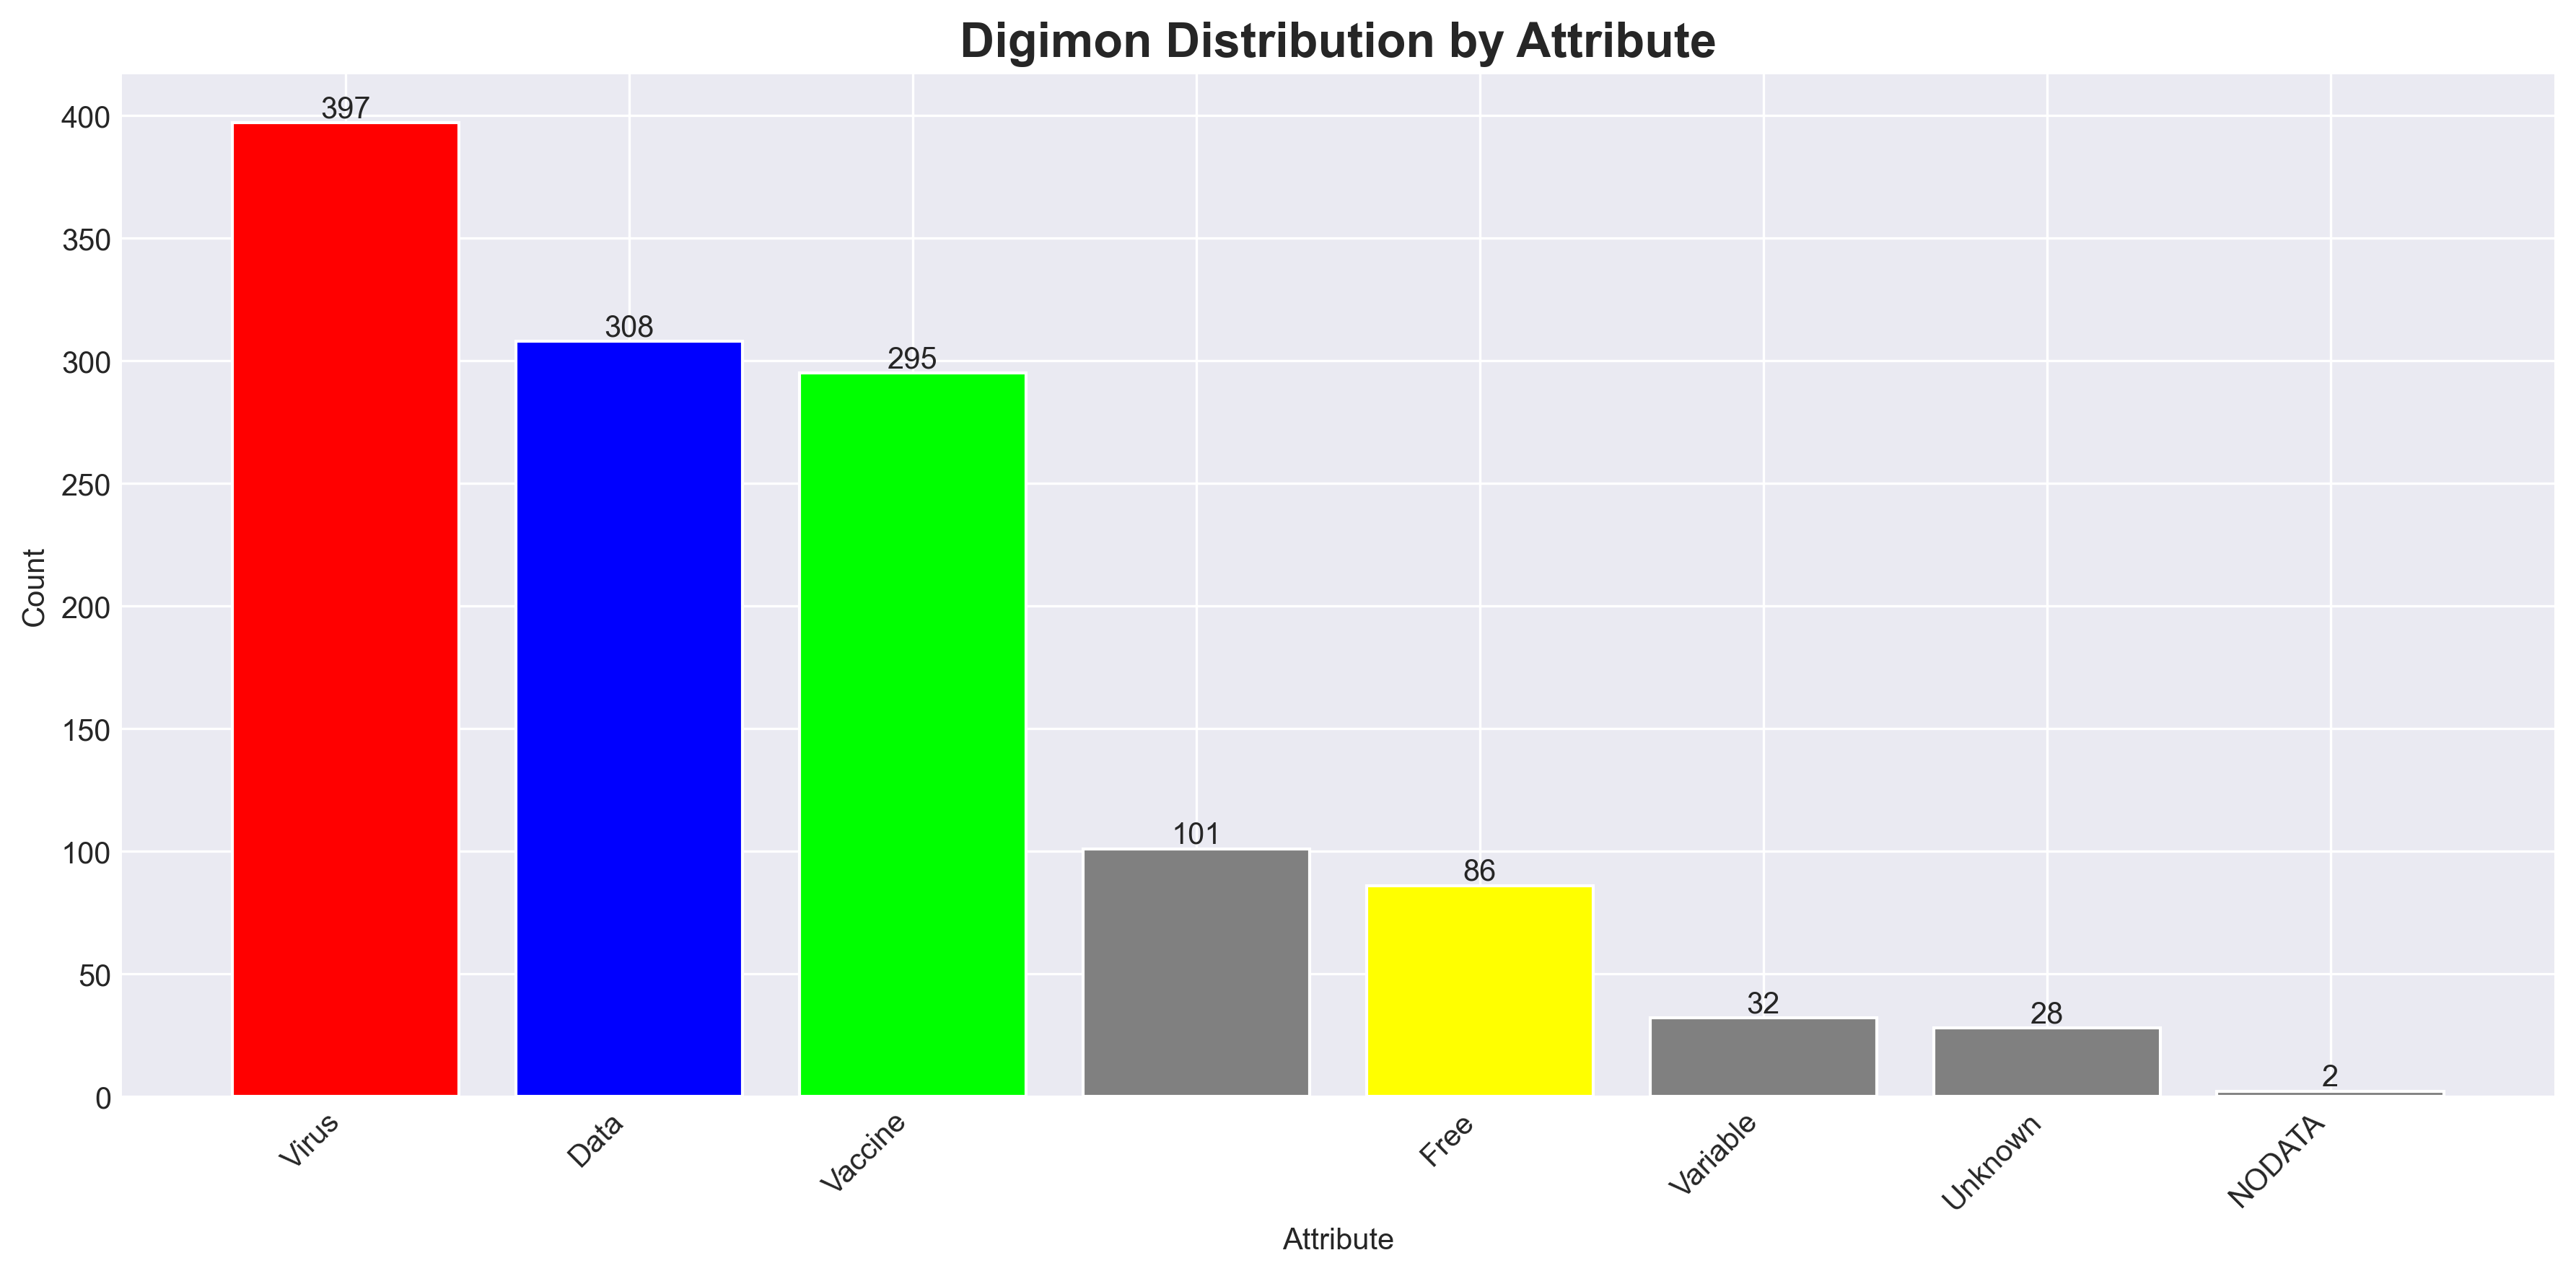

In [14]:
# Attribute distribution plot
fig = plot_distribution(
    digimon_df['attribute'],
    title="Digimon Distribution by Attribute",
    xlabel="Attribute",
    color_map=ATTRIBUTE_COLORS
)
save_figure(fig, "attribute_distribution", notebook_name=notebook_name)
plt.show()

Saved: ../results/01_data_exploration/figures/level_attribute_heatmap.png
Saved: ../results/01_data_exploration/figures/level_attribute_heatmap.svg
Saved: ../results/01_data_exploration/figures/level_attribute_heatmap.pdf


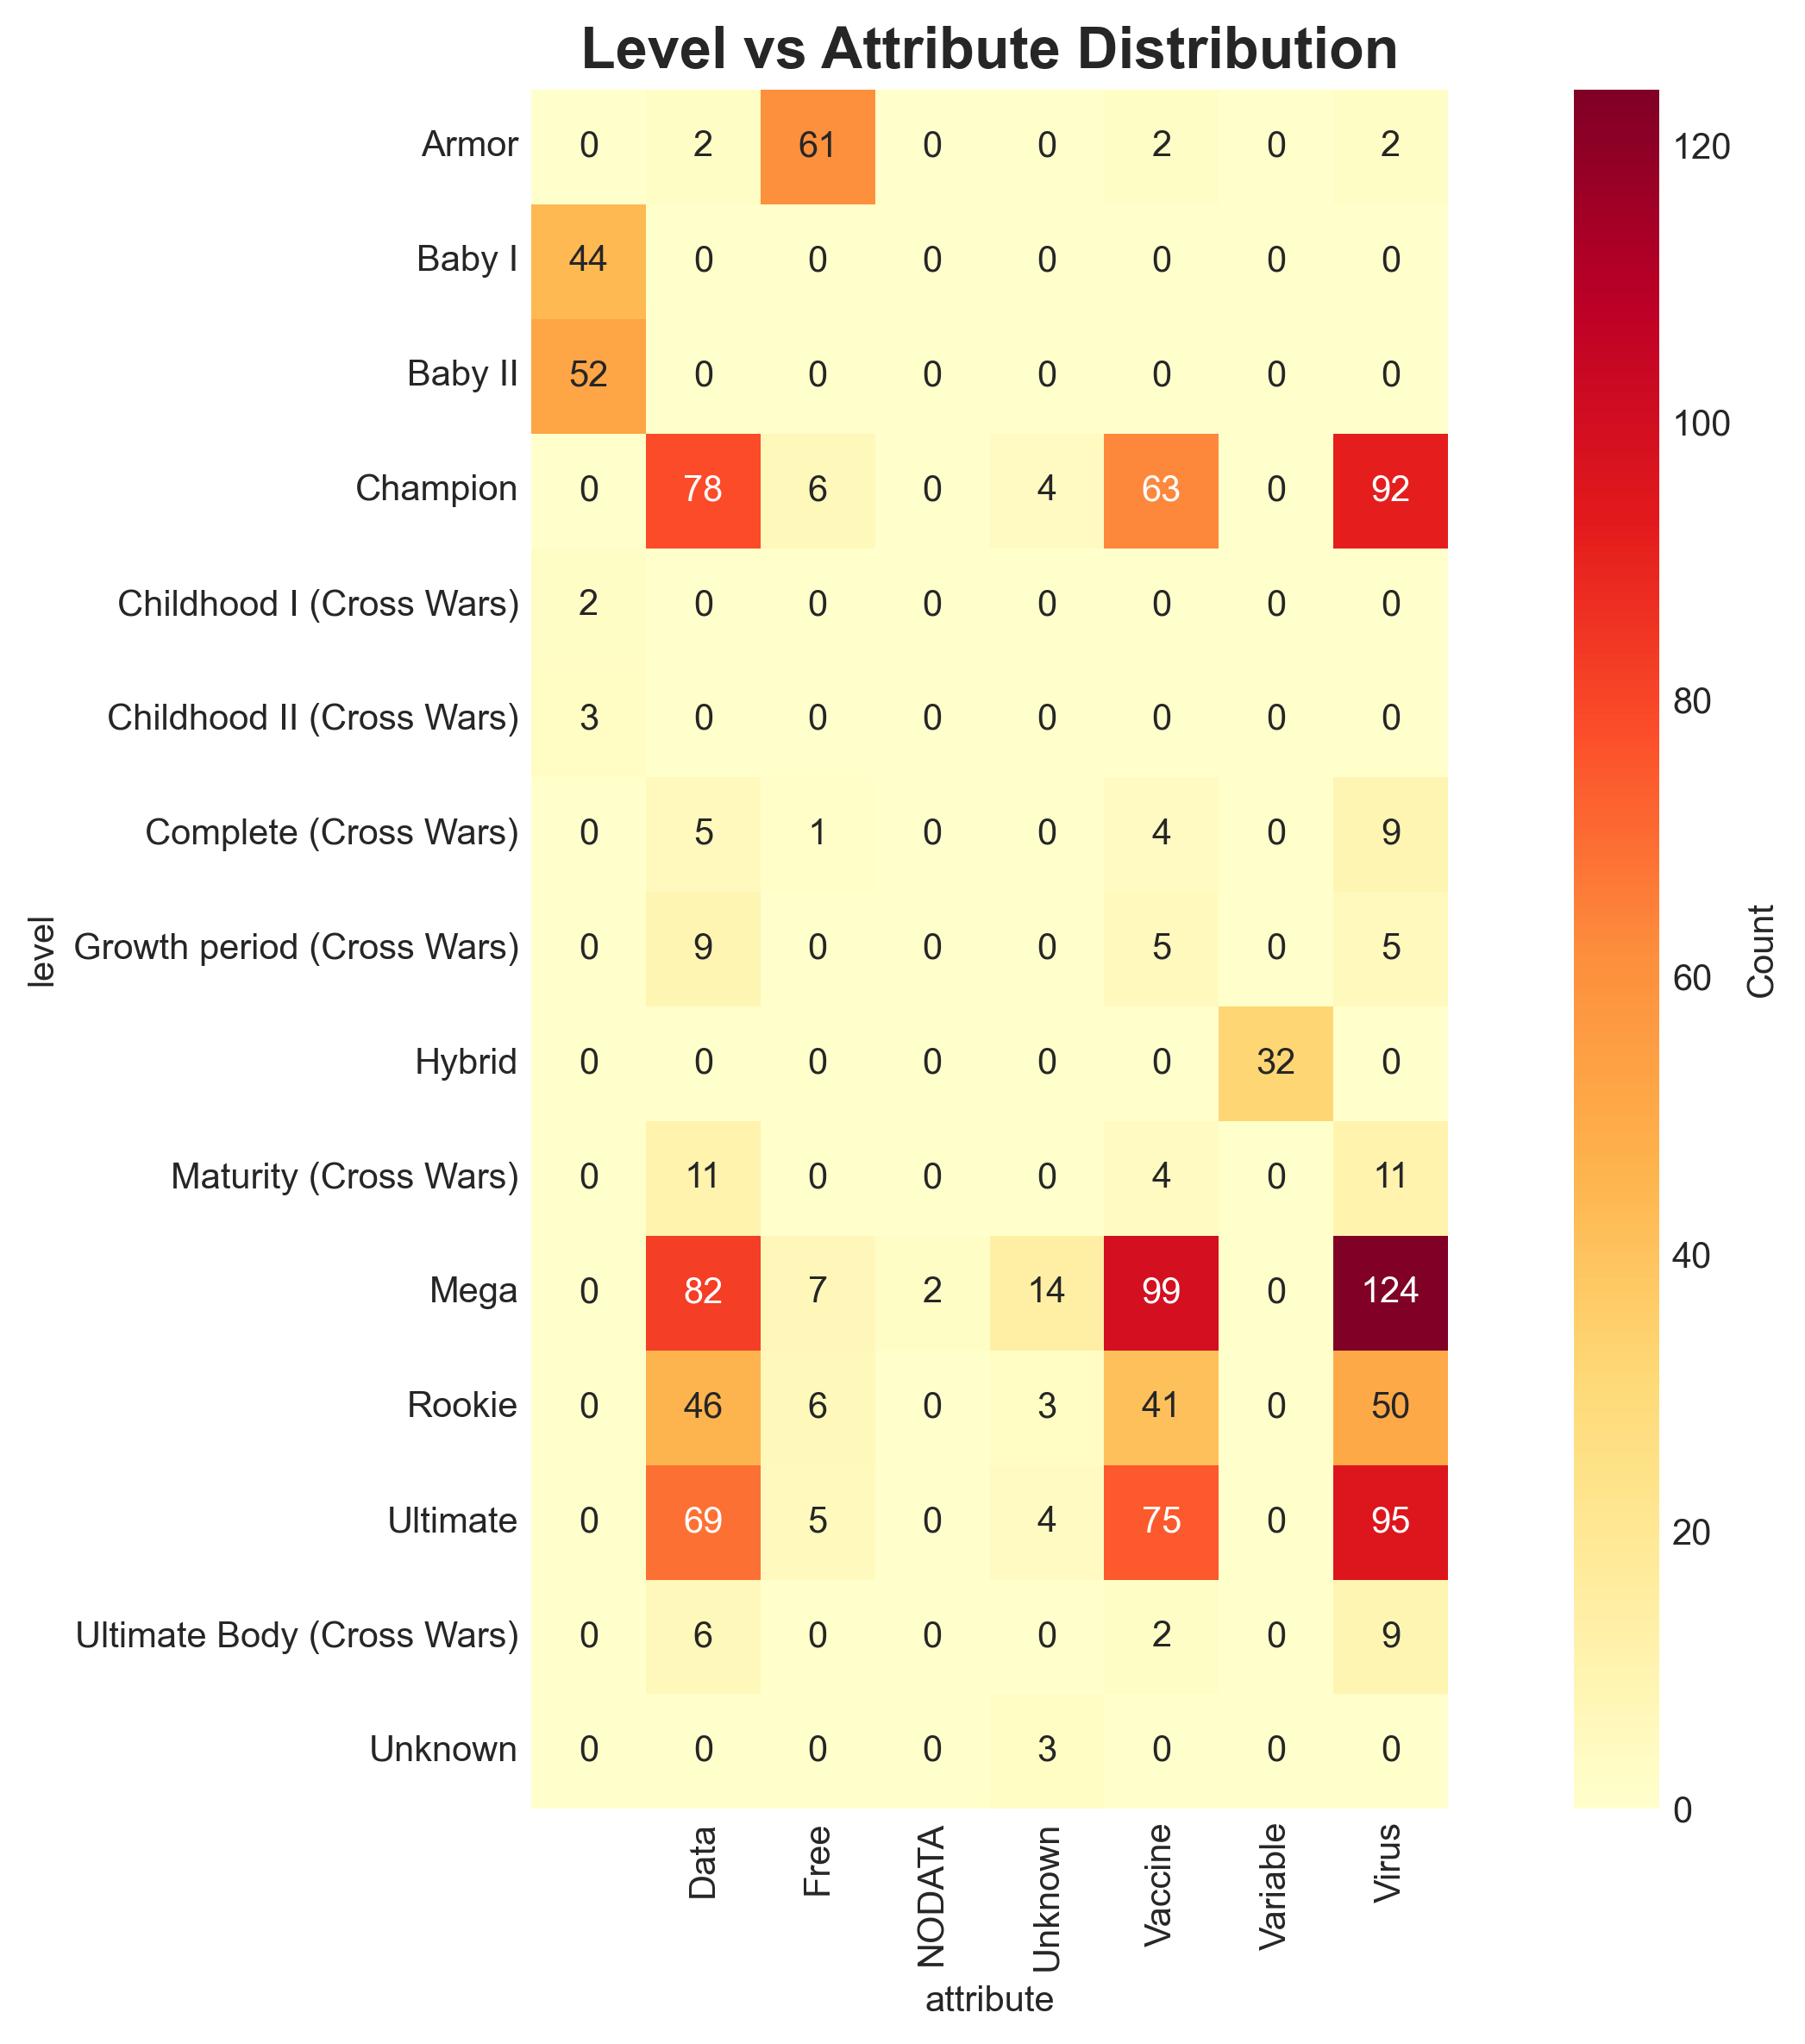

In [15]:
# Level-Attribute heatmap
fig = plot_heatmap(
    level_attr_cross,
    title="Level vs Attribute Distribution",
    figsize=(10, 8)
)
save_figure(fig, "level_attribute_heatmap", notebook_name=notebook_name)
plt.show()

Saved: ../results/01_data_exploration/figures/type_diversity_by_level.png
Saved: ../results/01_data_exploration/figures/type_diversity_by_level.svg
Saved: ../results/01_data_exploration/figures/type_diversity_by_level.pdf


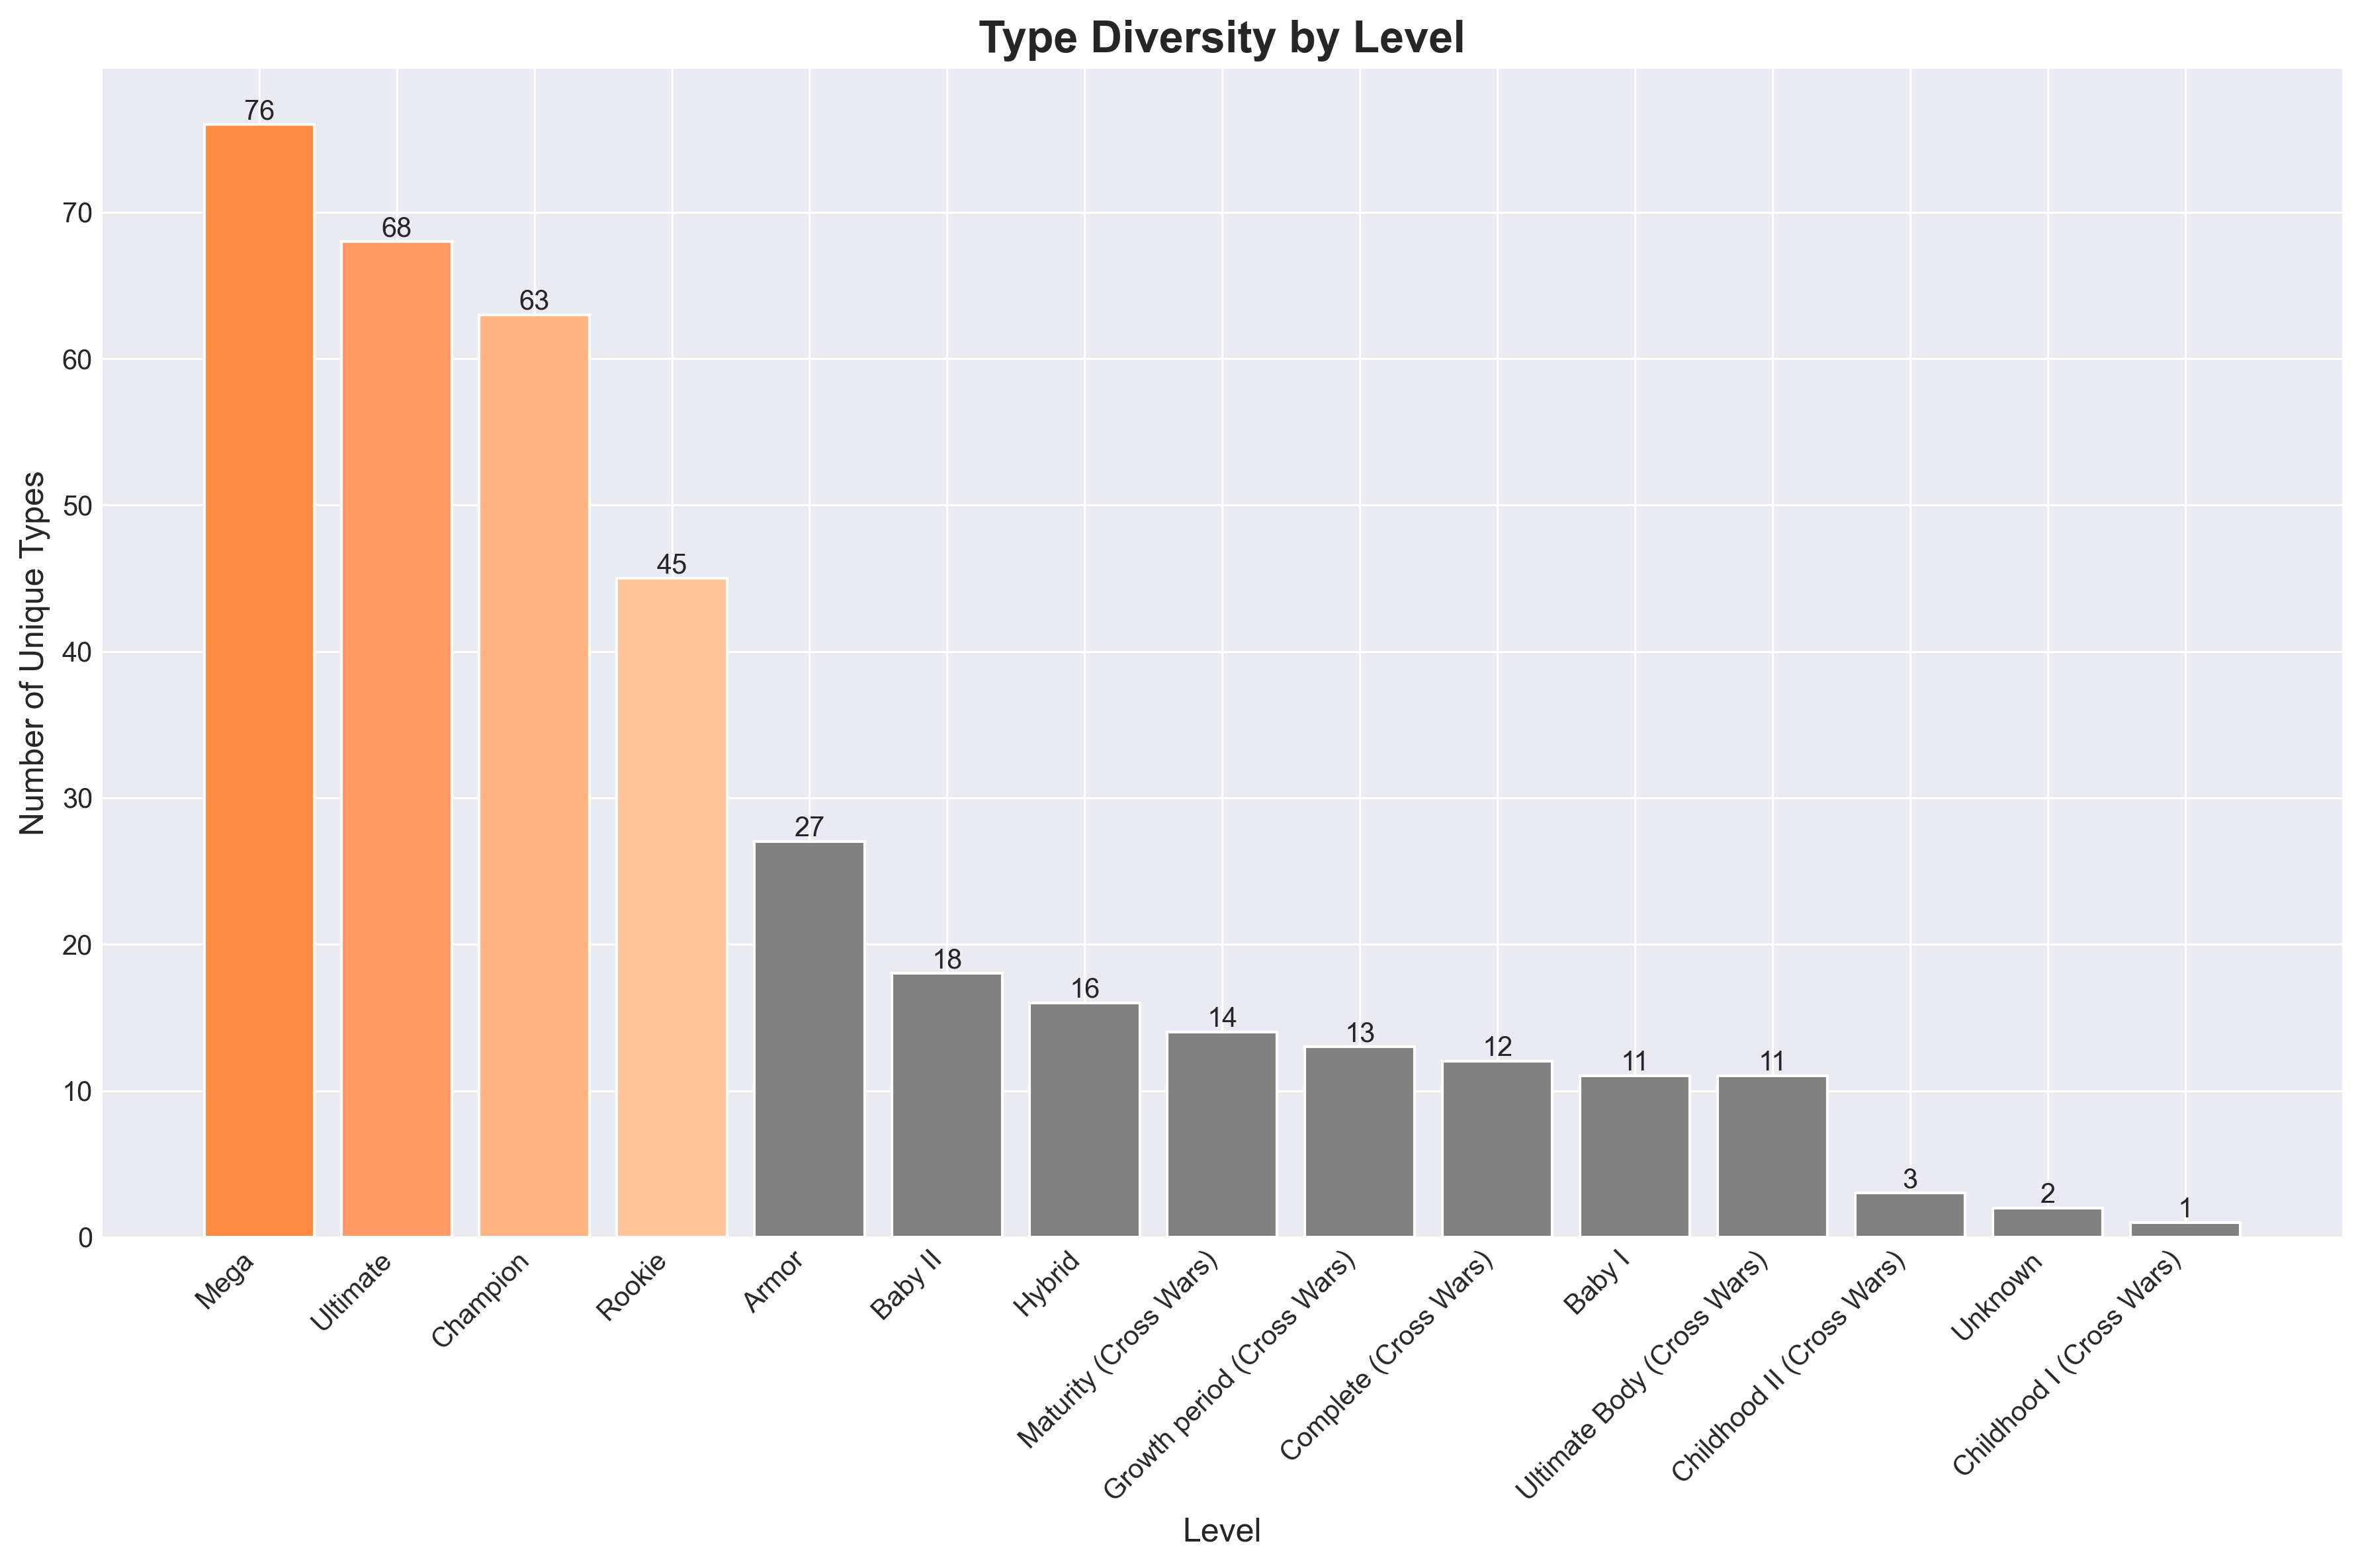

In [16]:
# Type diversity by level
type_by_level = digimon_df.groupby('level')['type'].nunique().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))  # Increased figure size
colors = [LEVEL_COLORS.get(level, '#808080') for level in type_by_level.index]
bars = ax.bar(type_by_level.index, type_by_level.values, color=colors)

ax.set_xlabel('Level', fontsize=12)
ax.set_ylabel('Number of Unique Types', fontsize=12)
ax.set_title('Type Diversity by Level', fontsize=16, fontweight='bold')

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom')

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent label cutoff
plt.tight_layout()
save_figure(fig, "type_diversity_by_level", notebook_name=notebook_name)
plt.show()

Saved: ../results/01_data_exploration/figures/relationship_distribution.png
Saved: ../results/01_data_exploration/figures/relationship_distribution.svg
Saved: ../results/01_data_exploration/figures/relationship_distribution.pdf


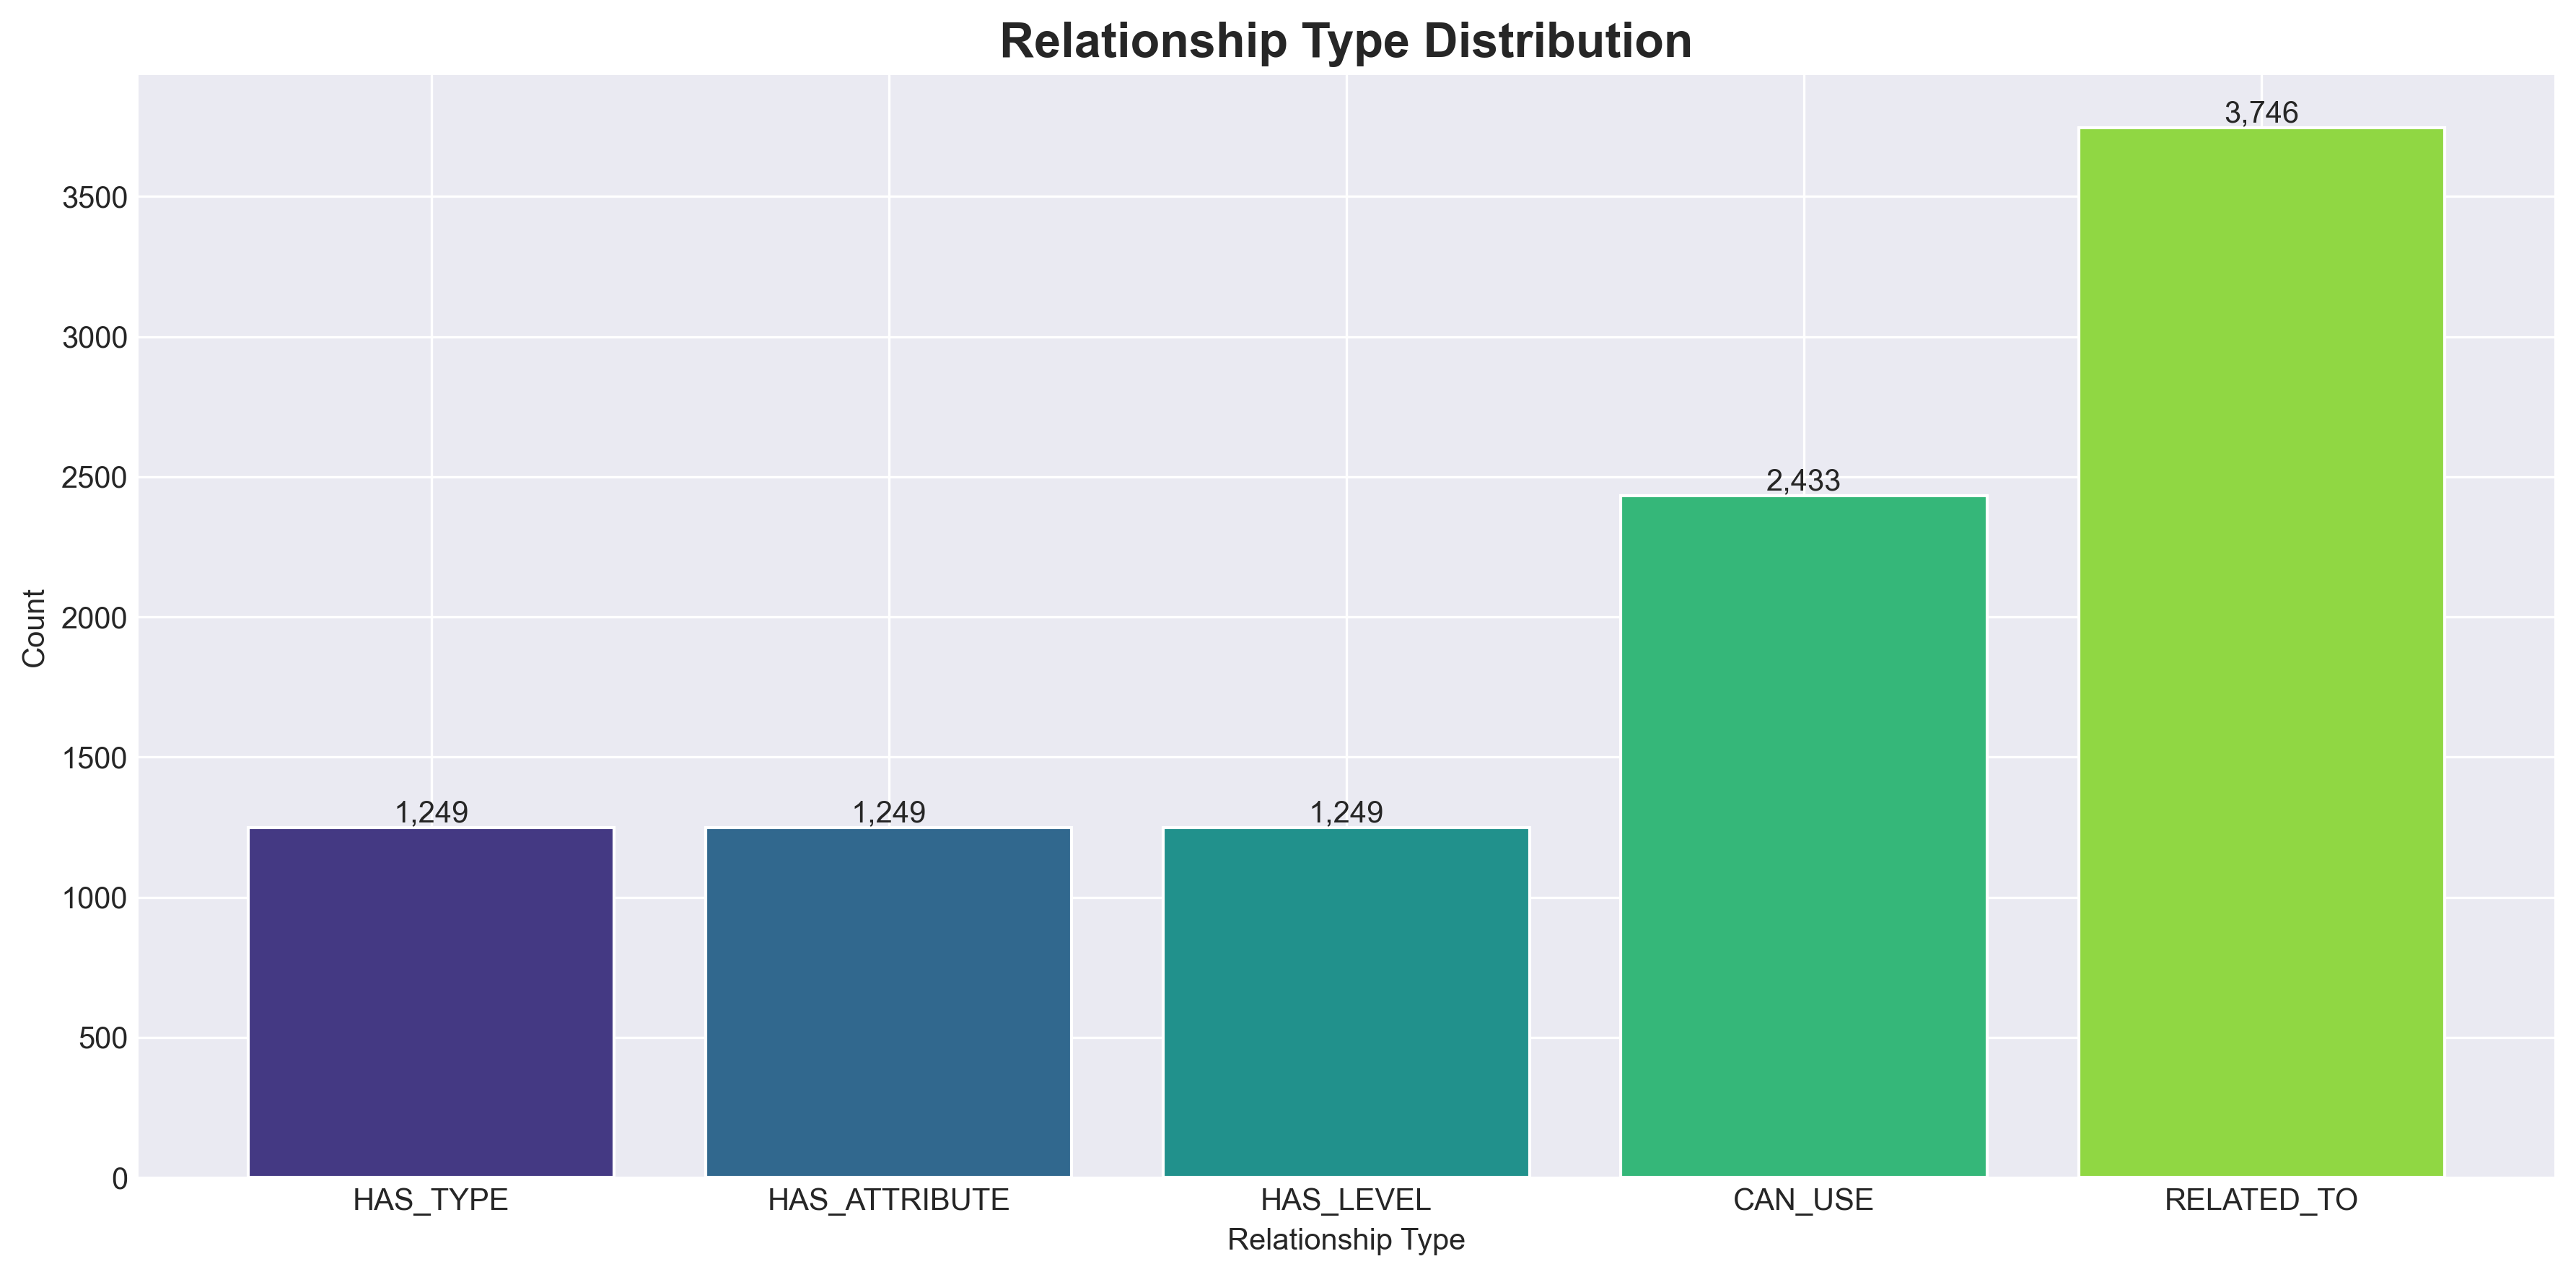

In [17]:
# Relationship density visualization
fig, ax = plt.subplots(figsize=(12, 6))

rel_types = ['HAS_TYPE', 'HAS_ATTRIBUTE', 'HAS_LEVEL', 'CAN_USE', 'RELATED_TO']
rel_counts = [stats[f'{rt.lower()}_count'] for rt in rel_types]

bars = ax.bar(rel_types, rel_counts, color=sns.color_palette('viridis', len(rel_types)))
ax.set_xlabel('Relationship Type')
ax.set_ylabel('Count')
ax.set_title('Relationship Type Distribution', fontsize=16, fontweight='bold')

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}', ha='center', va='bottom')

plt.tight_layout()
save_figure(fig, "relationship_distribution", notebook_name=notebook_name)
plt.show()

## 6. Export Results

In [18]:
# Create results directory with notebook-specific subfolder
notebook_name = "01_data_exploration"
results_dir = Path(f'../results/{notebook_name}/data')
figures_dir = Path(f'../results/{notebook_name}/figures')

# Create directories
results_dir.mkdir(parents=True, exist_ok=True)
figures_dir.mkdir(parents=True, exist_ok=True)

# Export statistics
with open(results_dir / 'graph_statistics.json', 'w') as f:
    json.dump(stats, f, indent=2)

# Export distribution data
level_dist.to_csv(results_dir / 'level_distribution.csv', index=False)
type_dist.to_csv(results_dir / 'type_distribution.csv', index=False)
attr_dist.to_csv(results_dir / 'attribute_distribution.csv', index=False)

# Export quality report
quality_df.to_csv(results_dir / 'data_quality_report.csv')

# Export cross-tabulation
level_attr_cross.to_csv(results_dir / 'level_attribute_crosstab.csv')

print(f"Results exported to: {results_dir}")
print(f"Figures saved to: {figures_dir}")

Results exported to: ../results/01_data_exploration/data
Figures saved to: ../results/01_data_exploration/figures


## Summary and Key Findings

Based on the data exploration, we have discovered:

1. **Dataset Size**: The knowledge graph contains approximately 1,249 Digimon with comprehensive relationship data

2. **Data Quality**: 
   - Very low missing data rates
   - All Digimon have associated levels, types, and attributes
   - Profile descriptions are comprehensive

3. **Level Distribution**: 
   - Most Digimon are concentrated in middle evolution levels (Rookie, Champion, Ultimate)
   - Fewer Baby and Ultra level Digimon

4. **Type Diversity**: 
   - Wide variety of types with some dominant categories
   - Higher evolution levels tend to have more type diversity

5. **Attribute Balance**: 
   - Relatively balanced distribution across Vaccine, Virus, and Data attributes
   - Some correlation between level and attribute preferences

These insights provide a solid foundation for deeper analysis in subsequent notebooks.

In [19]:
# Close database connection
conn.close()
print("Analysis complete! Database connection closed.")

Analysis complete! Database connection closed.
